In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


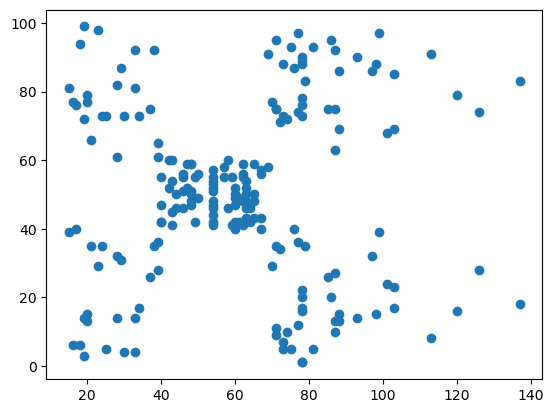

In [6]:
#draw a scatter plot
plt.scatter(df["Annual Income"],df["Spending Score"])


/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

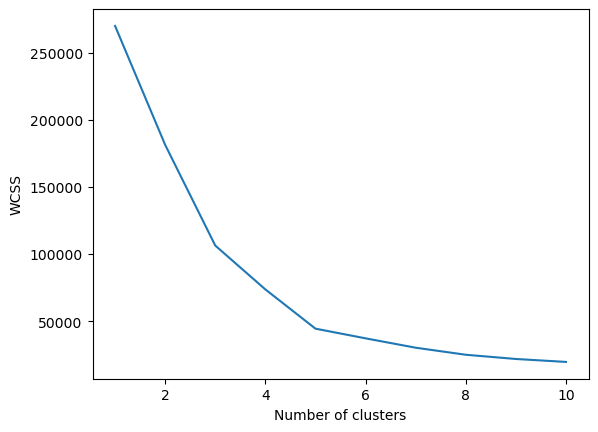

In [7]:
#clac the number of clusters 
wcc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(df[["Annual Income","Spending Score"]])
    wcc.append(kmeans.inertia_)
plt.plot(range(1,11),wcc)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()



In [8]:
#initialize the kmeans
kmeans=KMeans(n_clusters=5)

In [9]:
#select the features
features = df[['Annual Income','Spending Score' , 'Gender' , 'Age']]

In [10]:
model = KMeans(n_clusters=5)
model.fit(features)
labels = model.labels_
score = model.score(features)
inertia = model.inertia_

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# print the results
print(labels)
print(score)
print(inertia)
def kmeans(data):
    model = KMeans(n_clusters=5)
    model.fit(data)
    return model.labels_, model.score(data), model.inertia_

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]
-75399.61541401484
75399.61541401483


/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


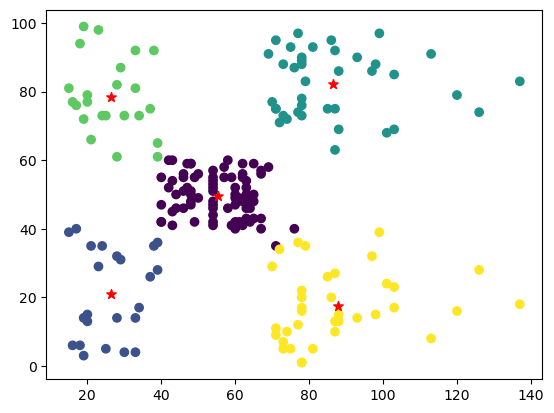

In [14]:
#draw the clusters 
labels, score, inertia = kmeans(features.values)
#draw the centroids
plt.scatter(features.values[:, 0], features.values[:, 1], c=labels)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red' , s=50, marker="*")  
plt.show()

